In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

import data_manager as dm
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest

import statsmodels.formula.api as smf

In [2]:
plt.style.use('ggplot')

In [3]:
df = dm.load_data('evraz_data_prprocessed_Anvar.csv')

In [4]:
df = df.groupby(['МАРКА']).get_group('Э76ХФ') # самая популярная марка

In [5]:
df = df.drop(columns=['Unnamed: 0', 'ПРОФИЛЬ', 'МАРКА'])
df

,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
8,7.0,47.016667,23.166667,47.016667,2.776518,0.421980,0.116688,0.118367,0.130000,0.038807,...,0.14,2.7,20.6,4.5,55.8,0.4,9.4,0.10,2.0,27.4
9,12.0,49.383333,32.166667,49.383333,3.626010,0.404285,0.116116,0.150958,0.129965,0.038460,...,0.20,2.3,23.1,4.8,55.0,0.6,7.6,0.14,2.0,27.2
10,23.0,42.033333,29.383333,42.033333,2.000000,0.305710,0.082368,0.058185,0.085275,0.037621,...,0.16,3.2,17.6,4.5,59.1,0.2,4.5,0.10,2.2,26.9
11,21.0,43.866667,25.716667,43.866667,2.000000,0.155380,0.077792,0.063437,0.060145,0.036754,...,0.13,2.9,22.3,4.9,61.3,0.3,5.7,0.13,2.3,26.3
12,20.0,49.733333,25.650000,49.733333,2.879104,0.349510,0.085800,0.122354,0.105160,0.038518,...,0.16,2.8,22.8,4.6,56.6,0.2,7.8,0.12,2.1,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,22.0,44.683333,22.016667,44.683333,3.000000,0.446595,0.127324,0.135122,0.159881,0.039533,...,0.11,2.3,21.1,4.9,51.1,0.6,5.6,0.12,2.3,22.6
2986,24.0,47.566667,20.083333,47.566667,2.000000,0.466490,0.118984,0.113016,0.163171,0.042203,...,0.18,2.5,22.0,4.8,51.5,1.0,8.7,0.09,2.3,22.8
2987,33.0,42.200000,17.850000,42.200000,4.000000,0.471755,0.137332,0.139956,0.176122,0.041047,...,0.63,2.1,25.2,6.6,56.1,0.9,7.0,0.18,2.3,24.6
2988,13.0,47.850000,20.750000,47.850000,3.000000,0.470500,0.153456,0.174962,0.130023,0.039660,...,0.13,2.4,22.4,6.2,58.0,0.6,7.1,0.12,2.3,25.2


In [6]:
def format_string(string):
    K = '_'
    for ele in string: 
        if ele.isdigit() or ele =='-': # and not (ele=='1' or ele=='0'): 
            string = string.replace(ele, K)
        if ele == '.': # and not (ele=='1' or ele=='0'): 
            string = string.replace(ele, '')
    string = string.replace(" ", "_")
    return string


In [7]:
new_column_names = [format_string(nc) for nc in df.columns]
df = df.rename(columns=dict(zip(df.columns, new_column_names)))
df.columns

Index(['t_вып_обр', 't_обработка', 't_под_током', 't_продувка', 'ПСН_гр',
       'чист_расход_C', 'чист_расход_Cr', 'чист_расход_Mn', 'чист_расход_Si',
       'чист_расход_V', 'температура_первая', 'температура_последняя',
       'Ar_(интенс)', 'эл_энергия_(интенс)', 'произв_жидкая_сталь',
       'произв_количество_обработок', 'расход_газ_Ar', 'сыпуч_известь_РП',
       'сыпуч_кокс_пыль_УСТК', 'сыпуч__кокс_мелочь_КМ_', 'сыпуч__шпат_плав',
       'ферспл_CaC_', 'ферспл__FeV___', 'ферспл__Mn_Si__Al__', 'ферспл_SiMn__',
       'ферспл__фх___А', 'эл_энергия', 'химсталь_первый_Al__',
       'химсталь_первый_C__', 'химсталь_первый_Cr__', 'химсталь_первый_Cu__',
       'химсталь_первый_Mn__', 'химсталь_первый_Mo__', 'химсталь_первый_N__',
       'химсталь_первый_Ni__', 'химсталь_первый_P__', 'химсталь_первый_S__',
       'химсталь_первый_Si__', 'химсталь_первый_Ti__', 'химсталь_первый_V__',
       'химсталь_последний_Al', 'химсталь_последний_C',
       'химсталь_последний_Ca', 'химсталь_после

In [8]:
def find_all_column_names_with_first_words(first_words, df):
    similar_column_names = []
    for column_name in df.columns:
        if column_name[0:len(first_words)] == first_words:
            similar_column_names.append(column_name)
    return similar_column_names

def plot_several_scatters_to_find_correlation(x_name, y_names, df):
    ncols=3
    nrows = np.ceil(len(y_names) / ncols).astype(int)
    fig, axes = plt.subplots(ncols=ncols, nrows = nrows, figsize=(7*ncols, 7*nrows), constrained_layout=True)
    axes = axes.flatten()
    pearson_coefs = [df[x_name].corr(df[y_name], method='pearson') for y_name in y_names]
    max_pearson_coef_index = np.argmax(pearson_coefs)

    for i, ax in enumerate(axes):
        if i<len(y_names):
            y_name = y_names[i]
            color = 'r' if i == max_pearson_coef_index else 'b'
            df.plot(kind='scatter',
                    x=x_name,
                    y=y_name,
                    color=color,
                    ax=ax)
            ax.set_title(f'Pearson={pearson_coefs[i]:.2f}')
        else:
            ax.axis("off")
    fig.suptitle(f'{x_name} vs others', fontsize=25)


---------------------------

In [27]:
# целевые переменные
y_cols = ['химшлак последний Al2O3', 
          'химшлак последний CaO', 
          'химшлак последний FeO',
          'химшлак последний MgO',
          'химшлак последний MnO', 
          'химшлак последний R',
          'химшлак последний SiO2']

def show_column_names(df):
    for column_name in df.columns:
        print(column_name)

show_column_names(df)
print(df['МАРКА'].unique())

t_вып_обр
t_обработка
t_под_током
t_продувка
ПСН_гр
чист_расход_C
чист_расход_Cr
чист_расход_Mn
чист_расход_Si
чист_расход_V
температура_первая
температура_последняя
Ar_(интенс)
эл_энергия_(интенс)
произв_жидкая_сталь
произв_количество_обработок
расход_газ_Ar
сыпуч_известь_РП
сыпуч_кокс_пыль_УСТК
сыпуч__кокс_мелочь_КМ_
сыпуч__шпат_плав
ферспл_CaC_
ферспл__FeV___
ферспл__Mn_Si__Al__
ферспл_SiMn__
ферспл__фх___А
эл_энергия
химсталь_первый_Al__
химсталь_первый_C__
химсталь_первый_Cr__
химсталь_первый_Cu__
химсталь_первый_Mn__
химсталь_первый_Mo__
химсталь_первый_N__
химсталь_первый_Ni__
химсталь_первый_P__
химсталь_первый_S__
химсталь_первый_Si__
химсталь_первый_Ti__
химсталь_первый_V__
химсталь_последний_Al
химсталь_последний_C
химсталь_последний_Ca
химсталь_последний_Cr
химсталь_последний_Cu
химсталь_последний_Mn
химсталь_последний_Mo
химсталь_последний_N
химсталь_последний_Ni
химсталь_последний_P
химсталь_последний_S
химсталь_последний_Si
химсталь_последний_Ti
химсталь_последний_V
химш

KeyError: 'МАРКА'

Процесс, на мой взгляд, выглядит так:

1. Сначала выплавляют чугун, на поверхность которого образуются камни шлака.
2. Берут пробы шлака и чугуна: 'химшлак первый \*' и 'химсталь первый \*' соответственно. С ними делают фазово-химический анализ. Его результаты заполняют в таблицу.
3. Добавляют лигирующие добавки, продувают и т.д. Варят сталь. На ней тоже есть шлак.
4. Из стали забират пробу и из ее шлака. Далают хим анализ. Заполняют колонки 'химшлак последний \*' и 'химсталь последний \*'.

Из процесса можно построить следующие гипотезы:

1. 'химшлак первый \*' и 'химсталь первый \*' - очевидно будут intercept-ами модели.
2. Будет корреляция химшлака с химсталбью для первой и последней пробы.

Попробуем это проверить

In [ ]:
x_names = find_all_column_names_with_first_words('химшлак первый', df)
y_names = find_all_column_names_with_first_words('химсталь первый', df)

corr = df[x_names+y_names].corr(method='pearson') 

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr * (corr>0.5), 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            ax=ax)

In [ ]:
y_names = find_all_column_names_with_first_words('химшлак первый', df)
x_name = 'химшлак последний Al2O3'
plot_several_scatters_to_find_correlation(x_name, y_names, df)

# Простая регрессионная модель

In [9]:
x_cols = ['чист расход C',
          'чист расход Cr',
          'чист расход Mn',
          'чист расход Si',
          'чист расход V',
          'сыпуч известь РП',
          'сыпуч кокс пыль УСТК',
          'сыпуч  кокс. мелочь КМ1',
          'сыпуч  шпат плав.',
          'ферспл CaC2',
          'ферспл  FeV-80',
          'ферспл  Mn5Si65Al0.5',
          'ферспл SiMn18',
          'ферспл  фх850А'] +\
              find_all_column_names_with_first_words(format_string('химсталь первый'), df) +\
                  find_all_column_names_with_first_words(format_string('химсталь последний').replace(" ", "_"), df) +\
                      find_all_column_names_with_first_words(format_string('химшлак первый').replace(" ", "_"), df)

y_cols = ['химшлак последний Al2O3', 
          'химшлак последний CaO', 
          'химшлак последний FeO',
          'химшлак последний MgO',
          'химшлак последний MnO', 
          'химшлак последний R',
          'химшлак последний SiO2']

x_cols = [format_string(x) for x in x_cols]
y_cols = [format_string(x) for x in y_cols]

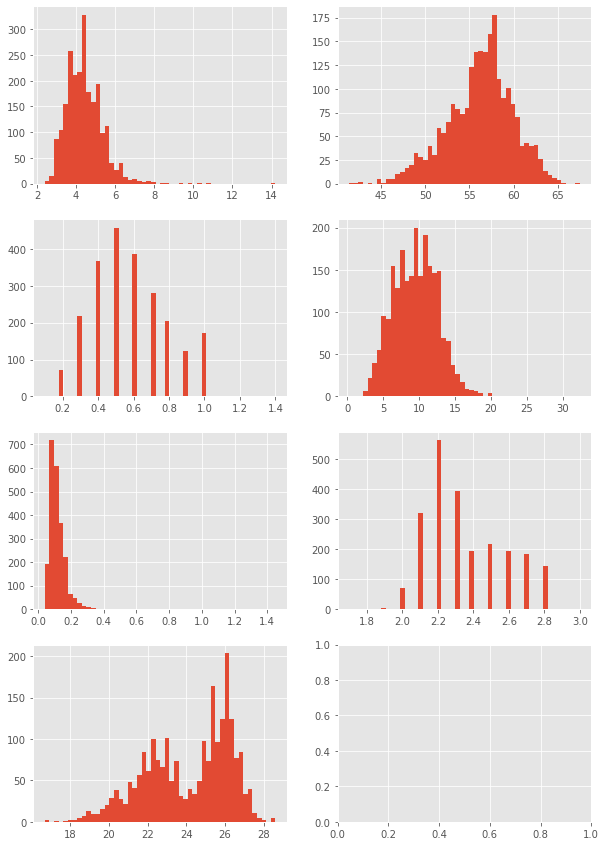

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))
axes = axes.flatten()
for y_col,ax in zip(y_cols, axes):
    df[y_col].hist(ax=ax, bins=50)

In [11]:
isfor = IsolationForest()
isfor.fit(df)
isfor_pred = isfor.predict(df)

df = df[isfor_pred==1]

print(df.shape)

(2241, 68)


# Begin

In [18]:
x_df, y_df = df[x_cols], df[y_cols[0]]
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1, random_state=42)

In [19]:
y_cols[0]

'химшлак_последний_Al_O_'

In [22]:
x_df

,чист_расход_C,чист_расход_Cr,чист_расход_Mn,чист_расход_Si,чист_расход_V,сыпуч_известь_РП,сыпуч_кокс_пыль_УСТК,сыпуч__кокс_мелочь_КМ_,сыпуч__шпат_плав,ферспл_CaC_,...,химсталь_последний_Si,химсталь_последний_Ti,химсталь_последний_V,химшлак_первый_Al_O___,химшлак_первый_CaO__,химшлак_первый_FeO__,химшлак_первый_MgO__,химшлак_первый_MnO__,химшлак_первый_R__,химшлак_первый_SiO___
8,0.421980,0.116688,0.118367,0.130000,0.038807,0.122,0.05,0.452,0.038,0.02,...,0.572,0.003,0.036,5.2,56.2,0.7,11.7,0.14,2.7,20.6
9,0.404285,0.116116,0.150958,0.129965,0.038460,0.082,0.05,0.429,0.048,0.02,...,0.563,0.003,0.035,5.0,53.8,1.4,10.1,0.20,2.3,23.1
10,0.305710,0.082368,0.058185,0.085275,0.037621,0.054,0.05,0.317,0.060,0.02,...,0.566,0.003,0.036,3.9,55.6,0.5,7.3,0.16,3.2,17.6
12,0.349510,0.085800,0.122354,0.105160,0.038518,0.060,0.05,0.368,0.072,0.02,...,0.563,0.003,0.036,4.9,63.0,0.7,10.4,0.16,2.8,22.8
13,0.350455,0.160403,0.038939,0.076329,0.037085,0.052,0.05,0.359,0.081,0.02,...,0.561,0.002,0.036,3.6,58.1,0.4,8.6,0.13,2.6,22.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,0.446595,0.127324,0.135122,0.159881,0.039533,0.065,0.05,0.479,0.041,0.02,...,0.584,0.003,0.038,4.9,49.4,0.3,7.6,0.11,2.3,21.1
2986,0.466490,0.118984,0.113016,0.163171,0.042203,0.101,0.05,0.506,0.061,0.02,...,0.564,0.003,0.039,4.7,54.0,1.1,11.0,0.18,2.5,22.0
2987,0.471755,0.137332,0.139956,0.176122,0.041047,0.199,0.05,0.508,0.039,0.02,...,0.570,0.003,0.039,4.3,53.9,0.8,12.6,0.63,2.1,25.2
2988,0.470500,0.153456,0.174962,0.130023,0.039660,0.128,0.05,0.502,0.060,0.02,...,0.562,0.003,0.038,4.8,54.1,0.7,9.9,0.13,2.4,22.4


In [39]:
len(X_train.columns)

48

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
min_max_scaler = MinMaxScaler()
df[df.columns] = min_max_scaler.fit_transform(df[df.columns])
df

,t_вып_обр,t_обработка,t_под_током,t_продувка,ПСН_гр,чист_расход_C,чист_расход_Cr,чист_расход_Mn,чист_расход_Si,чист_расход_V,...,химшлак_первый_MnO__,химшлак_первый_R__,химшлак_первый_SiO___,химшлак_последний_Al_O_,химшлак_последний_CaO,химшлак_последний_FeO,химшлак_последний_MgO,химшлак_последний_MnO,химшлак_последний_R,химшлак_последний_SiO_
8,0.066667,0.066836,0.286556,0.071833,0.333481,0.567489,0.384954,0.315990,0.288150,0.105022,...,0.043902,0.378378,0.455357,0.177966,0.551724,0.230769,0.283489,0.042553,0.230769,0.899160
9,0.122222,0.077757,0.473666,0.082696,0.492945,0.542509,0.382943,0.411446,0.288059,0.096880,...,0.073171,0.270270,0.566964,0.203390,0.521073,0.384615,0.227414,0.070922,0.230769,0.882353
10,0.244444,0.043839,0.415800,0.048960,0.187716,0.403353,0.264313,0.139724,0.171944,0.077202,...,0.053659,0.513514,0.321429,0.177966,0.678161,0.076923,0.130841,0.042553,0.384615,0.857143
11,0.222222,0.052300,0.339570,0.057375,0.187716,0.191135,0.248227,0.155107,0.106650,0.056846,...,0.039024,0.432432,0.531250,0.211864,0.762452,0.153846,0.168224,0.063830,0.461538,0.806723
12,0.211111,0.079372,0.338184,0.084302,0.352738,0.465184,0.276377,0.327668,0.223610,0.098231,...,0.053659,0.405405,0.553571,0.186441,0.582375,0.076923,0.233645,0.056738,0.307692,0.865546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985,0.233333,0.056068,0.262647,0.061123,0.375433,0.602238,0.422341,0.365064,0.365788,0.122062,...,0.029268,0.270270,0.477679,0.211864,0.371648,0.384615,0.165109,0.056738,0.461538,0.495798
2986,0.255556,0.069374,0.222453,0.074357,0.187716,0.630323,0.393024,0.300318,0.374336,0.184721,...,0.063415,0.324324,0.517857,0.203390,0.386973,0.692308,0.261682,0.035461,0.461538,0.512605
2987,0.355556,0.044609,0.176022,0.049725,0.563149,0.637755,0.457521,0.379222,0.407986,0.157584,...,0.282927,0.216216,0.660714,0.355932,0.563218,0.615385,0.208723,0.099291,0.461538,0.663866
2988,0.133333,0.070681,0.236313,0.075658,0.375433,0.635984,0.514200,0.481751,0.288210,0.125028,...,0.039024,0.297297,0.535714,0.322034,0.636015,0.384615,0.211838,0.056738,0.461538,0.714286


In [ ]:
df

In [23]:
def build_ols_request(df_x_columns, y_col):
    request = y_col + ' ~ '
    for i, col_name in enumerate(df_x_columns):
        if not i == 0:
            request += ' + '
        request += col_name
    return request

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(df)

In [46]:
def expell_names(array, names):
    return [elem for elem in array if not elem in names]

In [24]:
def select_features_back_estimation(x_df, y_df, y_col=y_cols[0]):
    df_x_columns = x_df.columns.tolist()
    exist_plevels_higher_05 = True

    while exist_plevels_higher_05:
    #for i in range(5):
        request = build_ols_request(df_x_columns, y_col)
        mod = smf.ols(request, data=df)
        res = mod.fit()
        summary = res.summary()
        print('R2: ',summary.tables[0].data[1][-1])
        t_values = pd.DataFrame(summary.tables[1].data[1:],
                                columns=['idx', 'name', 'coef', 't',
                                    'P>|t|', '[0.025', '0.975]'],
                                dtype=np.float64)

        t_values['name'] = ['Intercept'] + df_x_columns
        t_values = t_values.drop(columns=['idx', 'coef', 't', '[0.025', '0.975]'])
    
        exist_plevels_higher_05 = (t_values['P>|t|'] > 0.05).any()
        # print(exist_plevels_higher_05)
        t_values = t_values[t_values['P>|t|'] < np.max(t_values['P>|t|'])]
        df_x_columns = t_values['name'].tolist()[1:]
    return summary, res


In [25]:
summary, res = select_features_back_estimation(x_df, y_df)#.tables[0]

R2:     0.536
R2:     0.536
R2:     0.536
R2:     0.537
R2:     0.537
R2:     0.537
R2:     0.537
R2:     0.537
R2:     0.537
R2:     0.537
R2:     0.537
R2:     0.537
R2:     0.537
R2:     0.537
R2:     0.537
R2:     0.537
R2:     0.537
R2:     0.537
R2:     0.537
R2:     0.537
R2:     0.536
R2:     0.536
R2:     0.536
R2:     0.535
R2:     0.535
R2:     0.535
R2:     0.535


In [26]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     химшлак_последний_Al_O_   R-squared:                       0.539
Model:                                 OLS   Adj. R-squared:                  0.535
Method:                      Least Squares   F-statistic:                     118.0
Date:                     Wed, 03 Feb 2021   Prob (F-statistic):               0.00
Time:                             11:30:20   Log-Likelihood:                -2105.2
No. Observations:                     2241   AIC:                             4256.
Df Residuals:                         2218   BIC:                             4388.
Df Model:                               22                                         
Covariance Type:                 nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -5.3710      2.356     -2.280      0.023      -9.991      -0.751
чист_расход_C             -1.4052      0.601     -2.339      0.019      -2.583      -0.227
чист_расход_Cr             5.2977      2.005      2.643      0.008       1.366       9.229
чист_расход_Mn             5.8929      2.258      2.609      0.009       1.464      10.321
сыпуч_кокс_пыль_УСТК       0.7699      0.286      2.689      0.007       0.208       1.331
ферспл__Mn_Si__Al__       -4.3266      0.862     -5.021      0.000      -6.016      -2.637
химсталь_первый_Al__     104.2507     34.293      3.040      0.002      37.001     171.501
химсталь_первый_C__       -3.6448      0.738     -4.939      0.000      -5.092      -2.198
химсталь_первый_Cr__       6.8703      2.346      2.929      0.003       2.270      11.471
химсталь_первый_Mn__       8.8100      2.758      3.194      0.001       3.401      14.219
химсталь_первый_Si__      -5.3166      1.727     -3.078      0.002      -8.704      -1.929
химсталь_последний_Al    107.0110     31.517      3.395      0.001      45.204     168.818
химсталь_последний_C       3.4418      1.211      2.841      0.005       1.066       5.818
химсталь_последний_Ca   -166.5019     64.062     -2.599      0.009    -292.130     -40.874
химсталь_последний_Mn     -7.8037      2.705     -2.884      0.004     -13.109      -2.498
химсталь_последний_Mo     18.6354      7.423      2.511      0.012       4.079      33.192
химсталь_последний_Si      7.7565      1.599      4.850      0.000       4.620      10.893
химшлак_первый_Al_O___     0.6576      0.021     31.033      0.000       0.616       0.699
химшлак_первый_CaO__      -0.0508      0.013     -3.919      0.000      -0.076      -0.025
химшлак_первый_FeO__      -0.0578      0.022     -2.649      0.008      -0.101      -0.015
химшлак_первый_MnO__       0.3287      0.116      2.841      0.005       0.102       0.556
химшлак_первый_R__         1.1713      0.284      4.126      0.000       0.615       1.728
химшлак_первый_SiO___      0.0634      0.031      2.054      0.040       0.003       0.124
==============================================================================
Omnibus:                      430.085   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2139.044
Skew:                           0.822   Prob(JB):                         0.00
Kurtosis:                       7.495   Cond. No.                     2.92e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+05. This might indicate that there are
stron

In [34]:
for i,(y_pred, y_real) in enumerate(zip(res.predict(x_df), y_df)):
    if i<30:
        print('y_pred: ', y_pred, '     y_real: ', y_real, '     deviation%: ', abs(y_real-y_pred) / y_pred *100)

y_pred:  5.547984962047739      y_real:  4.5      deviation%:  18.889470126842806
y_pred:  5.203829603967327      y_real:  4.8      deviation%:  7.760238799123107
y_pred:  5.130590897742113      y_real:  4.5      deviation%:  12.29080451570648
y_pred:  5.38337386641196      y_real:  4.6      deviation%:  14.55172696252066
y_pred:  4.7930986427196896      y_real:  3.8      deviation%:  20.719344973801494
y_pred:  5.338492339523334      y_real:  5.6      deviation%:  4.898530218739902
y_pred:  5.312496178613454      y_real:  4.2      deviation%:  20.941119601968584
y_pred:  4.820373465908844      y_real:  4.7      deviation%:  2.4971813234008065
y_pred:  5.371341411246547      y_real:  5.3      deviation%:  1.3281861230636407
y_pred:  5.674392989328664      y_real:  6.7      deviation%:  18.074303499953302
y_pred:  5.176844247915769      y_real:  6.4      deviation%:  23.627439681552755
y_pred:  4.722972182848313      y_real:  5.4      deviation%:  14.33478307601185
y_pred:  5.0436545981

In [48]:
deviations = []
for i,(y_pred, y_real) in enumerate(zip(res.predict(X_test), y_test)):
    deviations.append(abs(y_real-y_pred) / y_pred *100)
    if i<30:
        print('y_pred: ', y_pred, '     y_real: ', y_real, '     deviation%: ', abs(y_real-y_pred) / y_pred *100)

y_pred:  4.420342113068795      y_real:  4.6      deviation%:  4.064343490519522
y_pred:  3.7223611941771875      y_real:  3.2      deviation%:  14.033060386356544
y_pred:  4.929034759950429      y_real:  5.2      deviation%:  5.497328650453579
y_pred:  4.509367339854506      y_real:  5.6      deviation%:  24.185935142304956
y_pred:  3.367314279167692      y_real:  3.4      deviation%:  0.9706762755862198
y_pred:  4.9602077353418945      y_real:  5.2      deviation%:  4.8343189933269475
y_pred:  5.2784470325923945      y_real:  5.2      deviation%:  1.486176371724748
y_pred:  4.421148602185067      y_real:  3.7      deviation%:  16.31134049257365
y_pred:  3.7680701985762663      y_real:  3.8      deviation%:  0.8473780938528661
y_pred:  4.766400528087015      y_real:  4.1      deviation%:  13.981211275890695
y_pred:  4.361348001838598      y_real:  4.6      deviation%:  5.471977885295871
y_pred:  4.971413894998809      y_real:  5.1      deviation%:  2.586509747871658
y_pred:  5.2220208

In [50]:
np.mean(deviations), np.std(deviations)

(9.784650735482709, 8.877009725420532)

In [36]:
from scipy.stats import chisquare

In [41]:
y_test_predicted = res.predict(X_test)

In [39]:
chisquare(f_obs=y_test.to_numpy(), f_exp=res.predict(X_test).to_numpy())

Power_divergenceResult(statistic=17.78388507816952, pvalue=1.0)

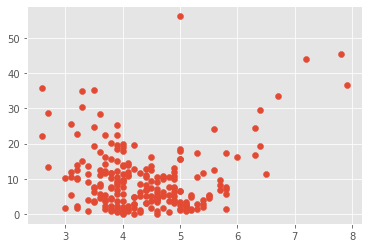

In [53]:
plt.scatter(y_test.to_numpy(), deviations)